In [95]:
import numpy as np
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

CSV_PATH = "iris.csv"

In [96]:
def load_csv(csv_path : str) -> Tuple[np.ndarray, np.ndarray]:
    np.random.seed(42)
    dataset = np.genfromtxt(csv_path, delimiter=',')
    np.random.shuffle(dataset)
    x, y = dataset[:, : -1], dataset[:, -1]
    return (x, y)

In [97]:
x, y = load_csv(CSV_PATH)
# np.mean(x, axis=0), np.var(x, axis=0)
np.nanmean(x, axis=0), np.nanvar(x, axis=0)
x[np.isnan(x)] = 3.5
#(x > 10.0).sum(), (x < 0.0).sum()
x[np.where(np.logical_or(x > 10.0, x < 0.0))]   # a konkrét kiugró értékek

y = np.delete(y, np.where(np.logical_or(x > 10.0, x < 0.0))[0], axis=0)
x = np.delete(x, np.where(np.logical_or(x > 10.0, x < 0.0))[0], axis=0)
x.shape, y.shape

((144, 4), (144,))

<h2>Train test split</h2>

In [98]:
def train_test_split(features : np.ndarray,
                     labels : np.ndarray,
                     test_split_ratio : float):
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"    # False kiértékelésre AssertionErrort dob a megadott üzenettel

    x_train, y_train = features[: train_size, :], labels[: train_size]
    x_test, y_test = features[train_size :, :], labels[train_size :]
    return (x_train, y_train, x_test, y_test)

x_train, y_train, x_test, y_test = train_test_split(x, y, 0.2)

In [99]:
def euclidean(points : np.ndarray, element_of_x : np.ndarray) -> np.ndarray:
    return np.sqrt(np.sum((points - element_of_x) ** 2, axis=1))

In [100]:
def predict(x_train : np.ndarray, y_train : np.ndarray, x_test : np.ndarray, k : int):
    labels_pred = []
    for x_test_element in x_test:
        distances = euclidean(x_train, x_test_element)
        distances = np.array(sorted(zip(distances, y_train)))
        label_pred = mode(distances[:k, 1], keepdims=False).mode
        labels_pred.append(label_pred)
    return np.array(labels_pred, dtype=np.int64)

y_preds = predict(x_train, y_train, x_test, 3)

In [101]:
def accuracy(y_test : np.ndarray, y_preds : np.ndarray) -> float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100

print(accuracy(y_test, y_preds))

32.142857142857146


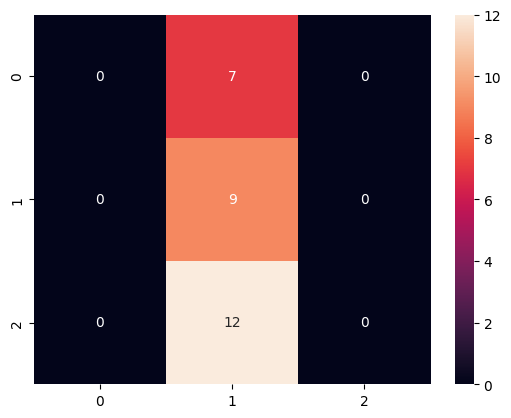

In [102]:
def plot_confusion_matrix(y_test : np.ndarray, y_preds : np.ndarray) -> None:
    conf_matrix = confusion_matrix(y_test, y_preds)
    sns.heatmap(conf_matrix, annot=True)

plot_confusion_matrix(y_test, y_preds)